# Load Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from os import path, walk, listdir
from pprint import pprint
from datetime import datetime

# Data Loading

In [2]:
BASE_DIR = './data'
PRICE_DIR = path.join(BASE_DIR, 'daily_price')
SIC_DIR = path.join(BASE_DIR, 'sic4_codes')

In [3]:
df_prices = pd.DataFrame()
for f in listdir(PRICE_DIR):
    p = path.join(PRICE_DIR,f)
    if path.isfile(p):
        try:
            df = pd.read_csv(p)
            info = f.replace('_daily_price.csv', '').split('_')
            df['composite_ticker'] = ':'.join(info[0:2])
            df['security_id'] = '_'.join(info[2:])
            df['open_diff'] = df.open - df.open.shift(1)
            df['close_diff'] = df.close - df.close.shift(1)
            df['intraday_range'] = df.high - df.low
            df['volumne_diff'] = df.volume - df.volume.shift(1)
            df['overnight_diff'] = df.open - df.close.shift(1)
            
            df['adj_open_diff'] = df.adj_open - df.adj_open.shift(1)
            df['adj_close_diff'] = df.adj_close - df.adj_close.shift(1)
            df['adj_intraday_range'] = df.adj_high - df.adj_low
            df['adj_low_diff'] = df.adj_low - df.adj_low.shift(1)
            df['adj_volumne_diff'] = df.adj_volume - df.adj_volume.shift(1)
            df['adj_overnight_diff'] = df.adj_open - df.adj_close.shift(1)
            
            df['open_diff_pct'] = df.open_diff / df.open
            df['close_diff_pct'] = df.close_diff / df.close
            df['overnight_diff_pct'] = df.overnight_diff / df.close.shift(1)
            
            df_prices = pd.concat([df_prices, df], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(p)

./data\daily_price\AFM_US_sec_wy3oVy_daily_price.csv
./data\daily_price\BGO_US_sec_gVE5D0_daily_price.csv
./data\daily_price\BIIB V_US_sec_z9mn6D_daily_price.csv
./data\daily_price\BLZ_US_sec_zJlMae_daily_price.csv
./data\daily_price\C.VS_US_sec_Xa8qOD_daily_price.csv
./data\daily_price\CNX WI_US_sec_yl29Pd_daily_price.csv
./data\daily_price\CTXS V_US_sec_XGY3vb_daily_price.csv
./data\daily_price\EIF_US_sec_gQLBjK_daily_price.csv
./data\daily_price\EKD_US_sec_z5dlnx_daily_price.csv
./data\daily_price\FCX A_US_sec_X6DnQ6_daily_price.csv
./data\daily_price\GE4317671_US_sec_gkx15o_daily_price.csv
./data\daily_price\HLT WI_US_sec_z9d0Pj_daily_price.csv
./data\daily_price\HON WI_US_sec_zo28V4_daily_price.csv
./data\daily_price\JPL.E_US_sec_yRWlYa_daily_price.csv
./data\daily_price\JPM3995814_US_sec_X7po9P_daily_price.csv
./data\daily_price\SPC_US_sec_z8w9Kb_daily_price.csv
./data\daily_price\VAR WI_US_sec_gxNPDK_daily_price.csv


In [4]:
df_prices.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,overnight_diff,adj_open_diff,adj_close_diff,adj_intraday_range,adj_low_diff,adj_volumne_diff,adj_overnight_diff,open_diff_pct,close_diff_pct,overnight_diff_pct
0,2005-12-30,False,daily,37.55,37.58,36.92,37.14,463271.0,35.394313,35.422591,...,NaN,NaN,NaN,0.622110,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-12-29,False,daily,37.45,37.95,37.19,37.38,508847.0,35.300054,35.771350,...,0.31,-0.094259,0.226222,0.716370,0.254500,45576.0,0.292203,-0.002670,0.006421,0.008347
2,2005-12-28,False,daily,38.00,38.15,36.35,37.45,878820.0,35.818480,35.959868,...,0.62,0.518425,0.065981,1.696665,-0.791777,369973.0,0.584407,0.014474,0.001869,0.016586
3,2005-12-27,False,daily,37.99,38.80,37.20,37.46,1277212.0,35.809054,36.572553,...,0.54,-0.009426,0.009426,1.508147,0.801203,398392.0,0.508999,-0.000263,0.000267,0.014419
4,2005-12-23,False,daily,36.73,38.00,36.73,37.73,1321716.0,34.621388,35.818480,...,-0.73,-1.187665,0.254500,1.197091,-0.443018,44504.0,-0.688092,-0.034304,0.007156,-0.019487


In [5]:
df_prices.to_csv('./data/prices.csv', index=False)

In [6]:
df_company_info = pd.read_csv(path.join(BASE_DIR, 'company_info.csv'))
df_company_info.head()

,id,ticker,name,lei,legal_name,stock_exchange,sic,short_description,long_description,ceo,...,entity_status,sector,industry_category,industry_group,template,standardized_active,first_fundamental_date,last_fundamental_date,first_stock_price_date,last_stock_price_date
0,com_NX6GzO,AAPL,Apple Inc,HWUPKR0MPOU8FGXBT394,APPLE INC,NASDAQ,3571,"Apple, Inc. engages in the design, manufacture...","Apple Inc. designs, manufactures, and markets ...",Tim Cook,...,ACTIVE,Consumer Goods,Consumer Durables,Electronic Equipment,indu,True,2007-09-29,2020-03-28,1980-12-12,2020-07-30
1,com_2zvNzA,XOM,Exxon Mobil Corp,J3WHBG0MTS7O8ZVMDC91,EXXON MOBIL CORP,NYSE,2911,"Exxon Mobil Corp. engages in the exploration, ...",Exxon Mobil Corporation explores for and produ...,Darren W. Woods,...,ACTIVE,Basic Materials,Energy,Major Integrated Oil & Gas,indu,True,2007-12-31,2020-03-31,1970-01-02,2020-07-30
2,com_0XLDXx,ORCL,Oracle Corp,1Z4GXXU7ZHVWFCD8TV52,ORACLE CORP,NYSE,7372,Oracle Corp. provides enterprise software and ...,"Oracle Corporation develops, manufactures, mar...",Larry Ellison,...,ACTIVE,Technology,Computer Software & Services,Application Software,indu,True,2008-05-31,2020-05-31,1986-03-12,2020-07-30
3,com_VXWJgv,KO,Coca-Cola Co,UWJKFUJFZ02DKWI3RY53,COCA COLA CO,NYSE,2080,The Coca-Cola Co. operates as a beverage compa...,"The Coca-Cola Company, a beverage company, man...",Ahmet Muhtar Kent,...,ACTIVE,Consumer Goods,Food & Beverage,Beverages - Soft Drinks,indu,True,2007-12-31,2020-06-26,1962-01-02,2020-07-30
4,com_NgYGzd,INTC,Intel Corp,KNX4USFCNGPY45LOCE31,INTEL CORP,NASDAQ,3674,"Intel Corp. designs, manufactures and sells co...","Intel Corporation designs, manufactures, and s...",Brian M. Krzanich,...,ACTIVE,Technology,Electronics,Semiconductor - Broad Line,indu,True,2007-12-29,2020-06-27,1980-03-17,2020-07-30


In [7]:
df_company_info['company_id'] = df_company_info.id
df_company_info = df_company_info.drop(columns=['id'])

In [8]:
df_securities = pd.read_csv(path.join(BASE_DIR, 'securities_list.csv'))
df_securities.head()

,id,company_id,name,code,currency,ticker,composite_ticker,figi,composite_figi,share_class_figi
0,sec_agjrgj,com_NX6GzO,Apple Inc,EQS,USD,AAPL,AAPL:US,BBG000B9Y5X2,BBG000B9XRY4,BBG001S5N8V8
1,sec_gkmNYz,com_2zvNzA,Exxon Mobil Corp.,EQS,USD,XOM,XOM:US,BBG000GZQBJ1,BBG000GZQ728,BBG001S69V32
2,sec_gPV3vz,com_0XLDXx,Oracle Corp.,EQS,USD,ORCL,ORCL:US,BBG000BQLY10,BBG000BQLTW7,BBG001S5SJG6
3,sec_X7m9Zy,com_VXWJgv,Coca-Cola Co,EQS,USD,KO,KO:US,BBG000BMX4N8,BBG000BMX289,BBG001S5SMQ8
4,sec_zvNxEz,com_NgYGzd,Intel Corp.,EQS,USD,INTC,INTC:US,BBG000C0GFS4,BBG000C0G1D1,BBG001S5SF65


In [9]:
df_securities['security_id'] = df_securities.id
df_securities = df_securities.drop(columns=['id'])

In [10]:
df_company_securities = pd.merge(
    df_securities[['security_id', 'company_id', 'name', 'ticker']],
    df_company_info[['company_id', 'stock_exchange', 'sector', 'industry_category', 'industry_group']],
    on=['company_id'], how='left'
)

In [11]:
df_company_securities.head()

,security_id,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
0,sec_agjrgj,com_NX6GzO,Apple Inc,AAPL,NASDAQ,Consumer Goods,Consumer Durables,Electronic Equipment
1,sec_gkmNYz,com_2zvNzA,Exxon Mobil Corp.,XOM,NYSE,Basic Materials,Energy,Major Integrated Oil & Gas
2,sec_gPV3vz,com_0XLDXx,Oracle Corp.,ORCL,NYSE,Technology,Computer Software & Services,Application Software
3,sec_X7m9Zy,com_VXWJgv,Coca-Cola Co,KO,NYSE,Consumer Goods,Food & Beverage,Beverages - Soft Drinks
4,sec_zvNxEz,com_NgYGzd,Intel Corp.,INTC,NASDAQ,Technology,Electronics,Semiconductor - Broad Line


In [12]:
df_prices = pd.merge(df_prices, df_company_securities, on=['security_id'], how='left')

In [13]:
df_prices.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,open_diff_pct,close_diff_pct,overnight_diff_pct,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
0,2005-12-30,False,daily,37.55,37.58,36.92,37.14,463271.0,35.394313,35.422591,...,NaN,NaN,NaN,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
1,2005-12-29,False,daily,37.45,37.95,37.19,37.38,508847.0,35.300054,35.771350,...,-0.002670,0.006421,0.008347,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
2,2005-12-28,False,daily,38.00,38.15,36.35,37.45,878820.0,35.818480,35.959868,...,0.014474,0.001869,0.016586,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
3,2005-12-27,False,daily,37.99,38.80,37.20,37.46,1277212.0,35.809054,36.572553,...,-0.000263,0.000267,0.014419,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines
4,2005-12-23,False,daily,36.73,38.00,36.73,37.73,1321716.0,34.621388,35.818480,...,-0.034304,0.007156,-0.019487,com_dXOpGz,American Airlines Group Inc,AAL,NASDAQ,Services,Transportation,Major Airlines


In [14]:
df_prices['date'] = pd.to_datetime(df_prices['date'])

# S&P500 Companies Analysis

In [15]:
print(f'Number of Companies: {len(df_company_info.company_id)}')

Number of Companies: 679


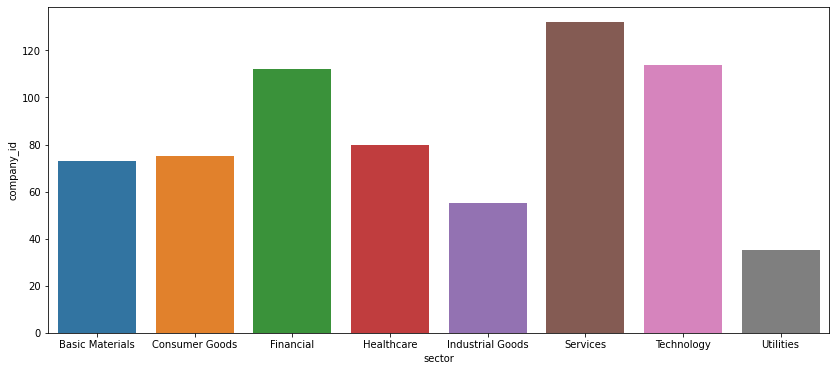

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(x='sector', y='company_id', data=df_company_info.groupby('sector').count().reset_index())

Checking through all the historical S&P500 companies shows that of the 679 companies that had a place in the index, the services sector has the most number of the stocks, followed by technology and financial. All 3 sectors have over 100 different stocks. Utilites sector has the least number of stocks.

In [99]:
df_prices.groupby('ticker').date.count().sort_values()

ticker
MTBPP        1
METw         1
FOX          1
TSNFB        3
JPMQL        3
         ...  
GE       13242
CAT      13243
J        16987
FOXA     18078
BKR      18504
Name: date, Length: 1003, dtype: int64

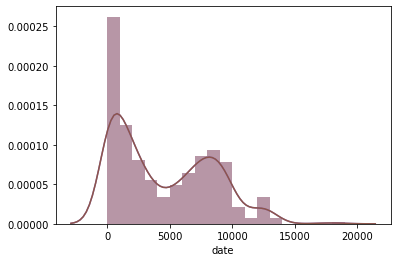

In [115]:
sns.distplot(df_prices.groupby('ticker').date.count(), bins=19, hist_kws={'range': (0, 19000)})

In [152]:
df_temp = df_prices.groupby('ticker').agg({
    'date': ['count', 'min', 'max'],
}).reset_index()
df_temp.columns = ['_'.join(_).strip() for _ in df_temp.columns.values]
df_temp = df_temp.loc[df_temp.date_count < 1305]
df_temp['date_diff'] = (df_temp.date_max - df_temp.date_min).dt.days

In [153]:
df_temp

,ticker_,date_count,date_min,date_max,date_diff
8,ACK,182,2010-08-11,2011-09-28,413
12,ADJ,233,2010-06-09,2011-07-26,412
25,AIG.WS,1281,2011-05-02,2018-03-29,2523
27,AIVpA,903,2014-05-19,2019-05-16,1823
29,AIZP,577,2018-03-15,2020-07-24,862
...,...,...,...,...,...
994,YUMw,11,2016-10-17,2016-10-31,14
998,ZIONO,12,2013-10-30,2014-05-28,210
999,ZIONP,36,2013-05-20,2014-05-29,374
1000,ZIONW,412,2018-08-23,2020-05-22,638


In [154]:
df_temp.to_csv('below_5years.csv', index=False)

Plotting the distribution of the 

In [17]:
df_prices_limited = df_prices.loc[(df_prices['date'] >= pd.to_datetime('1990-01-01')),:]

In [87]:
df_prices_limited = df_prices_limited.loc[(df_prices_limited.ticker != 'LDX')]
df_prices_limited = df_prices_limited.loc[(df_prices_limited.ticker != 'BMLpH')]
df_prices_limited = df_prices_limited.loc[(df_prices_limited.ticker != 'DPP')]

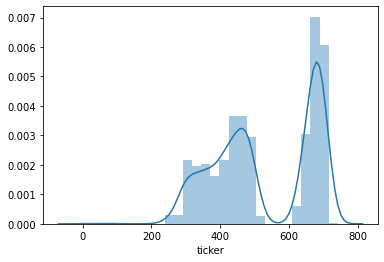

In [75]:
sns.distplot(df_prices_limited.groupby('date').ticker.count())

In [76]:
df_prices_limited.sector.unique()

array(['Services', 'Consumer Goods', 'Healthcare', 'Financial',
       'Technology', 'Utilities', 'Basic Materials', 'Industrial Goods',
       nan], dtype=object)

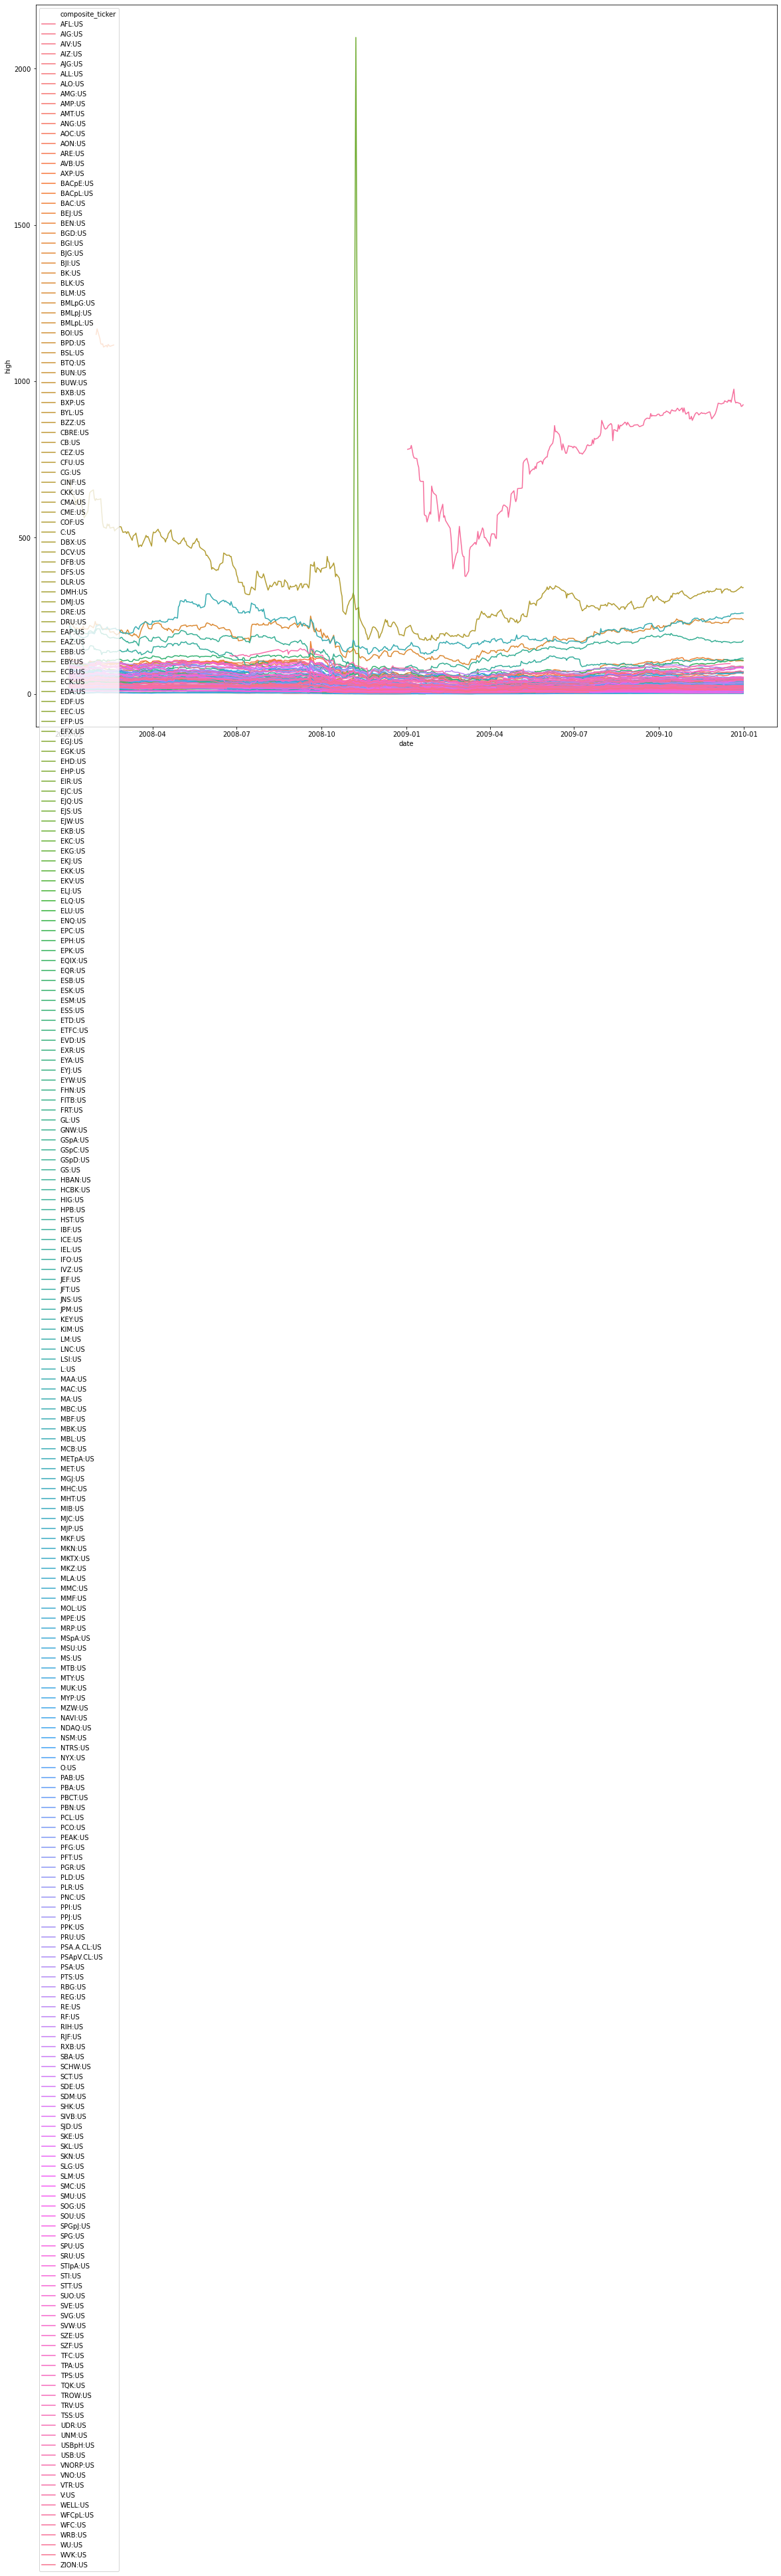

In [88]:
start_year = 2008
interval_year = 2
start_date = f'{start_year}-1-1'
end_date = f'{start_year+interval_year}-1-1'
plt.figure(figsize=(20,20))
sns.lineplot(
    x='date', y='high', hue='composite_ticker',
    data=df_prices_limited.loc[(df_prices_limited.sector=='Financial') & (df_prices_limited.date>=pd.to_datetime(start_date)) & (df_prices_limited.date<pd.to_datetime(end_date)),:])

In [93]:
df_prices_limited[(df_prices_limited.intraday_range >= 500)]

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,...,open_diff_pct,close_diff_pct,overnight_diff_pct,company_id,name,ticker,stock_exchange,sector,industry_category,industry_group
511106,2013-06-11,False,daily,95.50000,960.000,95.50000,960.000,53500.0,95.500000,960.000000,...,-9.000000,0.003646,-0.900157,com_EgAElg,Bank Of America Corp.,BCXQL,NYSE,Financial,Banking,Money Center Banks
572904,2013-05-16,False,daily,100.35000,980.000,100.00000,100.375,6261700.0,100.350000,980.000000,...,0.000997,0.000000,-0.000249,com_BgkBKy,Bank Of New York Mellon Corp,BKNML,NYSE,Financial,Financial Services,Asset Management
1095975,2013-07-15,False,daily,91.69800,935.000,91.69800,91.698,25400.0,91.698000,935.000000,...,-0.056315,-9.223778,-0.902189,com_ogDJ4z,Citigroup Inc,CYGXL,NYSE,Financial,Banking,Money Center Banks
1355006,2008-11-07,False,daily,9.86000,2100.000,8.37600,8.630,11200.0,9.860000,2100.000000,...,0.133874,0.012746,0.157277,com_ogDJ4z,Citigroup Inc,EJS,NYSE,Financial,Banking,Money Center Banks
2251740,2013-07-16,False,daily,116.48000,1164.800,112.50000,112.500,141.0,116.480000,1164.800000,...,-8.744162,-9.088889,-0.897374,com_PypBRX,JPMorgan Chase & Co.,JFTTL,NYSE,Financial,Banking,Money Center Banks
2251752,2013-06-26,False,daily,111.50000,1125.000,111.75000,1125.000,387.0,111.500000,1125.000000,...,-9.224215,-0.009333,-0.901805,com_PypBRX,JPMorgan Chase & Co.,JFTTL,NYSE,Financial,Banking,Money Center Banks
2251758,2013-06-18,False,daily,114.75000,1147.500,113.75000,1137.500,36052.0,114.750000,1147.500000,...,-8.956427,-0.007692,-0.899891,com_PypBRX,JPMorgan Chase & Co.,JFTTL,NYSE,Financial,Banking,Money Center Banks
2251763,2013-06-11,False,daily,114.75000,1138.125,113.93750,114.500,6060424.0,114.750000,1138.125000,...,0.008715,0.002183,0.004376,com_PypBRX,JPMorgan Chase & Co.,JFTTL,NYSE,Financial,Banking,Money Center Banks
2849896,2007-07-26,False,daily,24.75000,1000.000,24.60000,25.000,4127600.0,17.961511,725.717620,...,-0.021818,0.000000,-0.010000,com_Wy1Z7g,Morgan Stanley,MSpA,NYSE,Financial,Financial Services,Investment Brokerage - National
3091972,2020-03-19,False,daily,2266.63000,2865.990,2208.78000,2709.420,71416.0,2266.630000,2865.990000,...,-0.206170,0.141185,-0.025897,com_bXZ21X,NVR Inc.,NVR,NYSE,Industrial Goods,Materials & Construction,Residential Construction


In [78]:
df_sector_prices = df_prices_limited.groupby(['date','sector']).agg({
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean',
}).reset_index()

In [79]:
df_sector_prices.head()

,date,sector,open,high,low,close
0,1990-01-02,Basic Materials,37.552586,38.096034,37.255000,37.923966
1,1990-01-02,Consumer Goods,40.868975,41.711923,40.442564,41.519487
2,1990-01-02,Financial,39.845000,40.299722,39.578889,40.178611
3,1990-01-02,Healthcare,40.812800,41.408400,40.452800,41.313200
4,1990-01-02,Industrial Goods,36.665313,37.520313,36.442500,37.453750


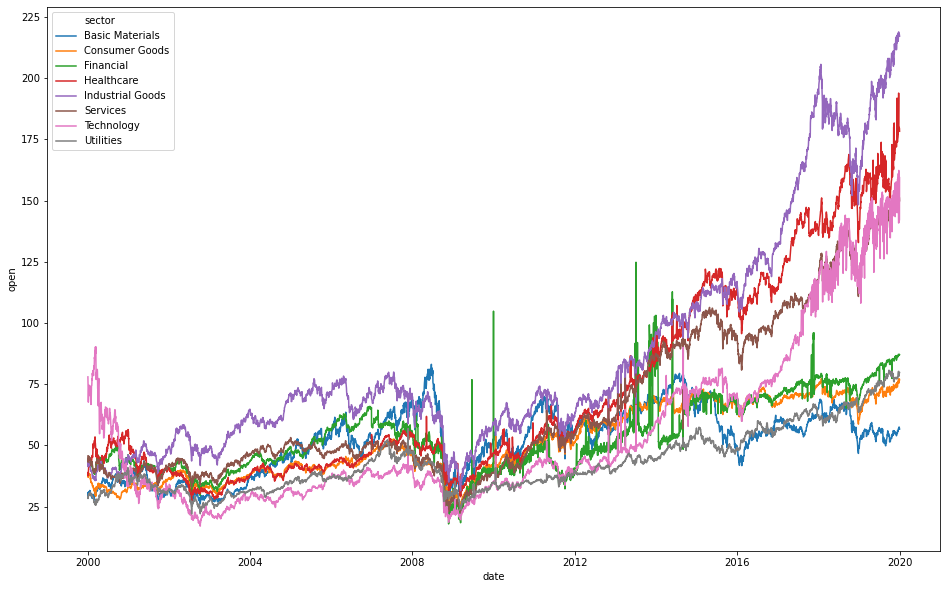

In [82]:
start_year = 2000
interval_year = 20
start_date = f'{start_year}-1-1'
end_date = f'{start_year+interval_year}-1-1'
plt.figure(figsize=(16,10))
sns.lineplot(
    x='date', y='open', hue='sector',
    data=df_sector_prices.loc[(df_sector_prices.date>=pd.to_datetime(start_date)) & (df_sector_prices.date<pd.to_datetime(end_date)),:])

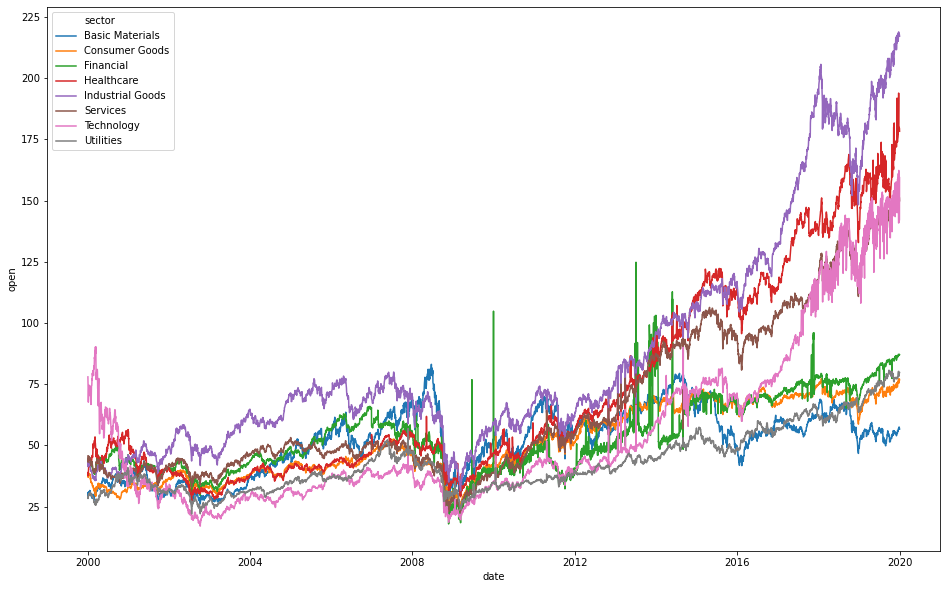

In [96]:
start_year = 2000
interval_year = 20
start_date = f'{start_year}-1-1'
end_date = f'{start_year+interval_year}-1-1'
plt.figure(figsize=(16,10))
sns.lineplot(
    x='date', y='open', hue='sector',
    data=df_sector_prices.loc[(df_sector_prices.date>=pd.to_datetime(start_date)) & (df_sector_prices.date<pd.to_datetime(end_date)),:])